# Clustering Stackoverflow Users by Post Tags from 2009 to 2010
<br>**by Prince Joseph Erneszer Javier**
<br>MSDS Asian Institute of Management


## Executive Summary

The analysis aimed to determine the classifications of Stack Overflow users based on tags of posts which the users commented on using k Means Clustering. The scope of analysis was set to be from years 2009 to 2010.

AIM ACCeSs Lab team collected posts and comments data from Stack Overflow. Among these data, `UserId` and post `Tags` from the year 2009 to 2010 were extracted. To reduce computational requirement, a sample with sample size of 1,100 for `UserId`s and corresponding `Tags` was randomly extracted from the dataset. A "profile" of each `UserId` was generated by concatenating all instances of tags per `UserId` in the sample and then applying Tf-Idf vectorization on the corpus of tags. The result was a Tf-Idf bag-of-words (BoW) matrix. 

The features in the BoW matrix was reduced 96 using singular value decomposition (SVD), while still explaining 95% of the variance ("information"). KMeans clustering was used on the reduced matrix with optimal number of clusters of 15 based on inter-intra cluster ratio. Clusters for the tags were used as proxy for the cluster of `UserId`. Possible clusters of users were determined based on the prominent tags in each cluster.

The identified user clusters are:

|Cluster|Most Common Words in Cluster|Proportion of Total, %|Possible User Cluster
|-|:-|-|:--|
|0|[flex, c#, .net]|27.6364|internet application developers, esp. using Adobe Flex|
|1|[c#, .net, asp.net]|11.0909|application developers, using C# on .net platforms
|2|[c++, c, c#]|8|developers using C++, C, and C#
|3|[java, hibernate, algorithm]|7.45455|data management professionals using using hibernate
|4|[php, mysql, javascript]|6.63636|website developers using php, javascript, and mysql
|5|[javascript, html, css]|5.81818|website developers using javascript, html, and css
|6|[python, django, php]|5.45455|web app developers using Django, powered by Python
|7|[sql, mysql, sql-server]|5.18182|database management professionals using sql, mysql, and sql-server
|8|[iphone, objective-c, cocoa-touch]|4.54545|iPhone developers using objective-c and cocoa-touch
|9|[jquery, javascript, java]|4.36364|HTML Javascript web developers using jquery
|10|[asp.net, c#, .net]|4.27273|web app developers
|11|[ruby, ruby-on-rails, regex]|3.54545|web app developers using Ruby and Ruby-on-Rails
|12|[android, java, algorithm]|3.09091|Android app developers
|13|[c, c++, embedded]|2.72727|C, C++ developers
|14|[maven-2, sonarqube, snapshot]|0.181818|application development project managers and quality checkers

A sample of 1,100 was extracted from a larger dataset of `UserId` and `Tags`. Further analysis by extracting different samples and of varying sample sizes may be conducted to validate the results of this analysis.

Other supervised clustering methods like k Medians, and k Medoids may also be explored in future studies.

## Description of Dataset

Two datasets containing comments, posts, and related data from https://stackoverflow.com/ were collated by the Asian Institute of Management Analytics, Computing, and Complex Systems Laboratory (ACCeSs Lab). According to Stack Overflow website, "Stack Overflow is a question and answer site for professional and enthusiast programmers. It's built and run by [users] as part of the Stack Exchange network of Q&A sites."

The dataset files are `Comments.xml` and `Posts.xml`. This study was limited to data from years 2009 to 2010.

## Extracting Datasets

Packages used for extracting the datasets were first loaded.

In [1]:
from lxml import etree
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

### Loading Data from 2009-2010 from Comments Dataset

Years 2009 to 2010 were selected to be the scope of the analysis. We extracted the dataset from `Comments.xml` from ACCeSs Lab servers. The features extracted were `Id`, `PostId`, `Score`, `Text`, `CreationDate`, and `UserId`. The dataset was saved in `stack_overflow_comments_1.csv`.

In [ ]:
# # saving to csv
# import csv

# tree = etree.iterparse('/mnt/data/public/stackoverflow/Comments.xml')

# max_date = '2010'

# with open('stack_overflow_comments_1.csv', 'w') as csvfile:
#     fieldnames = ['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
    
#     for i in range(0, 60000000):
#         event, child = next(tree)
        
#         _ = {k: v for k, v in dict(child.attrib).items() if k in fieldnames}
#         years = re.findall('\d\d\d\d', _['CreationDate'])[0]
#         if years == '2009' or years =='2010':
#             writer.writerow(_)
            
#         if int(years) > int(max_date):
#             break
            
#         child.clear()
        
    

### Getting Posts Dataset

We then extracted the dataset from `Posts.xml` from ACCeSs Lab servers. The features extracted were `Id`, `Score`, `CreationDate`, and `Tags`. The dataset was saved in `stack_overflow_posts_1.csv`.

In [ ]:
# # saving to csv
# tree = etree.iterparse('/mnt/data/public/stackoverflow/Posts.xml')

# max_date = '2010'

# with open('stack_overflow_posts_1.csv', 'w') as csvfile:
#     fieldnames = ['Id', 'Score', 'CreationDate', 'Tags']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
    
#     for i in range(0, 35000000):
#         event, child = next(tree)
#         years = re.findall('\d\d\d\d', child.attrib['CreationDate'])[0]   
        
#         if int(years) > int(max_date):
#                 print(years)
#                 break
        
#         if 'Tags' in child.keys() and 'Id' in child.keys() and int(child.attrib['Id']) in unique_posts:
#             _ = {k: v for k, v in dict(child.attrib).items() if k in fieldnames}         
#             if years == '2009' or years =='2010':
#                 writer.writerow(_)
                
#         child.clear()

## Preprocessing the Data

The extracted datasets were loaded into `df_posts` and `df_comments`.

In [2]:
df_posts = pd.read_csv("stack_overflow_posts_1.csv")
df_comments = pd.read_csv("stack_overflow_comments_1.csv").drop('Id', axis=1)

The columns in `df_posts` are `Id`, `Score`, `CreationDate`, and `Tags`.

In [3]:
df_posts.columns

Index(['Id', 'Score', 'CreationDate', 'Tags'], dtype='object')

The columns in `df_comments` are `PostId`, `Score`, `Text`, `CreationDate`, and `UserId`.

In [4]:
df_comments.columns

Index(['PostId', 'Score', 'Text', 'CreationDate', 'UserId'], dtype='object')

`UserId` is found in `df_comments` while `Tags` is found in `df_posts`. Since we wanted to cluster `UserId` based on `df_comments`, we joined the two datasets. `PostId` in `df_columns` refer to `Id` in `df_posts`. Hence, `Id` in `df_posts` was renamed to `PostId`. The two dataframes were then combined on `PostId`. The resulting dataframe was saved in a temporary dataframe `df_merged_`. 

`PostId`, `Text`, `CreationDate_y`, `CreationDate_x` columns in `df_merged_` were not needed for this analysis and so were then dropped. THe new dataframe was saved in `df_merged`.

In [5]:
_ = df_posts.rename(columns={'Id':'PostId'})

tags_ = [re.sub('[\<\>]',' ',_.Tags[i]) for i in range(len(_.Tags))]
_.Tags = tags_

df_merged_ = pd.merge(_, df_comments, on='PostId', how='inner').reset_index(drop=True).dropna()
df_merged_.shape

df_merged = df_merged_.drop(['PostId', 'Text',
                            'CreationDate_y', 'CreationDate_x'], axis=1).reset_index(drop=True).dropna()

Each column in `df_merged` corresponds to a unique comment on a post. However, a user could comment multiple times on a comment. This means that a `UserId` value can come up multiple times in the dataset. We wanted to "profile" each user Id by tags. To do so, the `UserId`'s were grouped into unique values and the corresponding tags used by each user were concatenated or stitched together. This gives the "fingerprint" of the user based on tags. The new dataset was saved in `df_grouped`.

In [6]:
df_grouped = df_merged[['Tags', 'UserId']]
df_grouped = df_grouped.groupby(by='UserId').sum().reset_index()

`df_grouped` contains 82,694 rows and 2 columns.

In [7]:
df_grouped.shape

(82694, 2)

In [8]:
df_grouped.head()

,UserId,Tags
0,1.0,multithreading user-interface asynchronous ...
1,2.0,security authentication authorization sql-...
2,3.0,c# .net algorithm cocoa macos isight vi...
3,4.0,c# vb6 ms-word tiff c# excel com inter...
4,5.0,sql sql-server tsql facebook asp.net url...


## Exploratory Data Analysis

In [9]:
from collections import Counter
from itertools import chain

There are a total of **2,784,986 tags** in the dataset.

In [10]:
# Tags counts
tag_counts = Counter(("".join(df_merged.Tags.ravel())).split())

total_tags = len(("".join(df_merged.Tags.ravel())).split())
total_tags

2784986

There are a total of **19,244 unique tags** in the dataset.

In [11]:
unique_tags = len(set(("".join(df_merged.Tags.ravel())).split()))
unique_tags

19244

Below are the top 10 most frequently-used tags. Programming languages c#, php, c++, and java were the most commonly-used tags. **It's possible that we find a big cluster of users that frequently use c#, php, c++, and java.**

In [12]:
counts = pd.DataFrame.from_dict(dict(tag_counts), orient='index').reset_index(drop=False)

top_tags = counts.sort_values(by=0, ascending=False)[:10].reset_index(drop=True)
top_tags['pct'] = top_tags[0]/total_tags*100
top_tags

top_tags

,index,0,pct
0,c#,132860,4.770581
1,php,86619,3.110213
2,c++,84530,3.035204
3,java,84036,3.017466
4,javascript,68500,2.459617
5,jquery,52843,1.897424
6,.net,52268,1.876778
7,python,44620,1.602162
8,c,41650,1.495519
9,asp.net,39388,1.414298


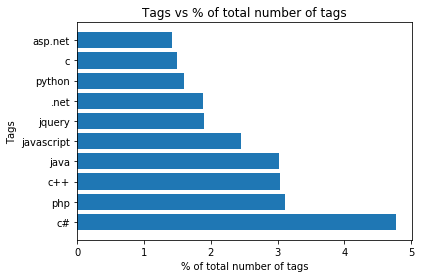

In [13]:
plt.barh(top_tags.index, top_tags.pct)
plt.xlabel('% of total number of tags')
plt.ylabel('Tags')
plt.yticks(range(0, 10), top_tags['index'])
plt.title('Tags vs % of total number of tags')
plt.savefig('top_tags.png');

The average number of unique tags per user is 15. The median is 5, the maximum is 1884 and minimum is 1. Users who use many tags have wide interests.

In [97]:
# Average unique tags per person
counts = [len(set(df_grouped.Tags[i].split())) for i in range(len(df_grouped.Tags))]
print("Mean number of tags per user: %s"%np.mean(counts))
print("Median number of tags per user: %s"%np.median(counts))
print("Maximum number of tags per user: %s"%np.max(counts))
print("Minimum number of tags per user: %s"%np.min(counts))

Mean number of tags per user: 15.492538757346361
Median number of tags per user: 5.0
Maximum number of tags per user: 1884
Minimum number of tags per user: 1


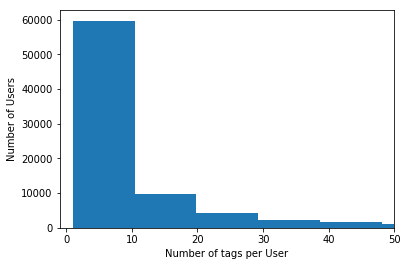

In [16]:
# Average number of comments per person
plt.hist(counts, bins=200)
plt.xlim(-1, 50)
plt.xlabel("Number of tags per User")
plt.ylabel("Number of Users");

### Sampling Data

A sample was obtained from the `df_grouped` dataset. **The two objectives of sampling are 1) to obtain a sample that represents the population and 2) to obtain a sample that is small enough to reduce computational requirement.** Using the equation

\begin{equation}
n_{samples} = \frac{Z_{score}}{4*ERR^2} 
\end{equation}

For a 95% confidence interval with error margin of 3%, the Z-score is 1.96 and number of samples is at least 1067. **For this analysis, a sample size of 1100 was considered sufficient.**

In [17]:
# Calculating minimum samples
from scipy import stats
CI =0.95 # confidence interval
ERR=0.03 # error margin
         # n=number of sample needed

'''
Determine the location Z in the upper tail where 
the area under the curve of the Gaussian plot is CI%
'''
Z=stats.norm.ppf(1-((1-CI)/2)) 

n=Z**2/(4*(ERR**2))

print("Z = {}".format(Z))
print("sample needed n = {}".format(n))

Z = 1.959963984540054
sample needed n = 1067.0718946372572


In [18]:
df_sample = df_grouped.sample(n=1100, random_state=42).loc[:,['Tags', 'UserId']].reset_index(drop=True)
df_sample.head()

,Tags,UserId
0,css image css3 grayscale mysql backup m...,463065.0
1,php debugging stdin command-line-interface...,348221.0
2,python python,255247.0
3,ruby shoes delphi tcp performance client...,22722.0
4,ruby sinatra bundler,515275.0


In [19]:
# Average unique tags per person
counts = [len(set(df_sample.Tags[i].split())) for i in range(len(df_sample.Tags))]

The average number of unique tags per user in the sample is 13. The median is 5, the maximum is 529 and minimum is 1. **The sample mean and median are close to the population mean and median but the maximum has been reduced to 529 as expected since fewer users use higher numbers of unique tags.**

In [20]:
# Average unique tags per person
counts = [len(set(df_sample.Tags[i].split())) for i in range(len(df_sample.Tags))]
print("Mean number of tags per user: %s"%np.mean(counts))
print("Median number of tags per user: %s"%np.median(counts))
print("Maximum number of tags per user: %s"%np.max(counts))
print("Minimum number of tags per user: %s"%np.min(counts))

Mean number of tags per user: 13.387272727272727
Median number of tags per user: 5.0
Maximum number of tags per user: 529
Minimum number of tags per user: 1


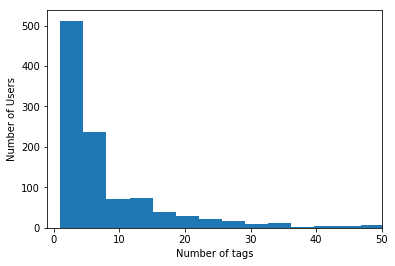

In [21]:
# Average number of comments per person
plt.hist(counts, bins=150)
plt.xlim(-1, 50)
plt.xlabel("Number of tags")
plt.ylabel("Number of Users");

### Bag-of-Words Vectorization

Term-frequency inverse document frequency vectorization (Tf idf) is a method that converts text in a set of documents into vectors of numbers. TfIdf considers both the frequency of words in the document and the number of documents containing each of those words. More information can be found in http://www.tfidf.com/ and https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html.

Here, we used `sklearn`'s `TfidfVectorizer` package to vectorize the concatenated tags per `UserId` in the sample dataset `df_sample`. Tags that occurred in 50% of the samples were removed because they were deemed to be too common to add new information. Similarly, tags that occurred in less than 10 samples were removed because they were deemed too rare to add new information about clusters. More information about this package can be found here http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

vect = TfidfVectorizer(token_pattern ='[^\s]*', min_df=10, max_df=0.5)
# vect = CountVectorizer(token_pattern ='[^\s]*', max_df=0.5)
bow = vect.fit_transform(df_sample.Tags)
X_ = bow.todense()

X_.shape

(1100, 288)

After vectorizing each sequence of tags per user, **the resulting vector had 288 "features" each corresponding to a unique tag.**

## Dimensionality Reduction

We then performed dimensionality reduction to reduce the number of "features". Earlier we found that the vectorized tags contained 288 features. It might be possible that only few of these features explain 95% of the information. In order to find out, we used a dimensionality reduction method. The method used here is singular value decomposition (SVD). Information about SVD can be found here http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm.

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
tags = df_sample.Tags
comps = int(X_.shape[1]/3) # check comps up to 1/3 of length of features

svd = TruncatedSVD(n_components=comps)
X_svd = svd.fit_transform(X_)
var = svd.explained_variance_ratio_
c_var = var.cumsum()
c_var;

The variance or "information" explained per feature in the dimensionally-reduced TfIdf matrix is shown in the first plot below. Notice that the first few features or principal components explain majority of the information. The second plot shows the cumulative information explained.

**95% of the information or variance is explained by 96 principal components.**

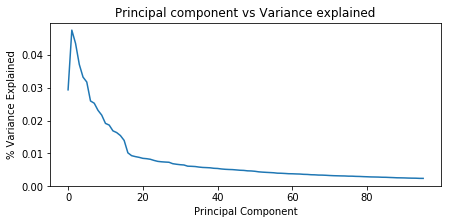

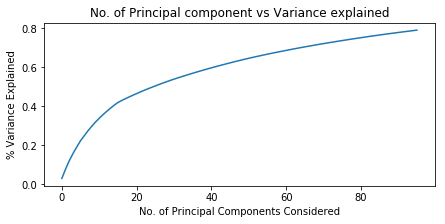

In [25]:
plt.figure(figsize = (7, 3))
plt.plot(var)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Principal component vs Variance explained')
plt.show()
plt.figure(figsize = (7, 3))
plt.plot(c_var)
plt.xlabel('No. of Principal Components Considered')
plt.title('No. of Principal component vs Variance explained')
plt.ylabel('% Variance Explained');

In [26]:
n_95 = [c_var < 0.95][0].sum()
n_95

96

Using 96 principal components, the new matrix is saved in `X_svd_2`.

In [27]:
svd = TruncatedSVD(n_components = n_95)
X_svd_2 = svd.fit_transform(X_)
X_svd_2.shape

(1100, 96)

## Clustering

### KMeans Clustering

K means clustering is an unsupervised clustering algorithm, which means that the actual classifications of the inputs are unknown and the algorithm determines it by itself given certain parameters. In the case of K means, **the hyperparameter is the target number of clusters.**

We used **three internal validation measures:** intra- vs inter-cluster ratio (minimize), silhouette coefficient (maximize), and within cluster sum of squares or "inertia" (minimize). These internal validation measures were plotted vs the number of clusters. The optimal clusters were then chosen based on the measures.

More information about k Means and these validation measures can be found in http://scikit-learn.org/stable/modules/clustering.html, http://www.sthda.com/english/wiki/wiki.php?id_contents=7927

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

from sklearn.metrics import silhouette_score

The function (credit: Prof. Christian Alis) for intra/inter ratio is defined below.

In [29]:
def intra_to_inter(X, y, dist, r):
    """Compute intracluster to intercluster distance ratio
    
    Parameters
    ----------
    X : array
        Data matrix with each row corresponding to a point
    y : array
        Class label of each point
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
    r : integer
        Number of pairs to sample
        
    Returns
    -------
    ratio : float
        Intracluster to intercluster distance ratio
    """
    dist_P = []
    dist_Q = []
    for i, j in np.random.randint(low=0, high=len(y), size=[r,2]):
        # just skip the pair even if we end up having pairs less than r
        if i == j:
            continue
        # intracluster
        elif y[i] == y[j]:
            dist_P.append(dist(X[i], X[j]))
        # intercluster
        else:
            dist_Q.append(dist(X[i], X[j]))
    intra = np.sum(dist_P) / len(dist_P)
    inter = np.sum(dist_Q) / len(dist_Q)
    ratio = intra / inter
    return ratio

Below, we calculated and plotted internal validation measures for n clusters from 2 to 29.

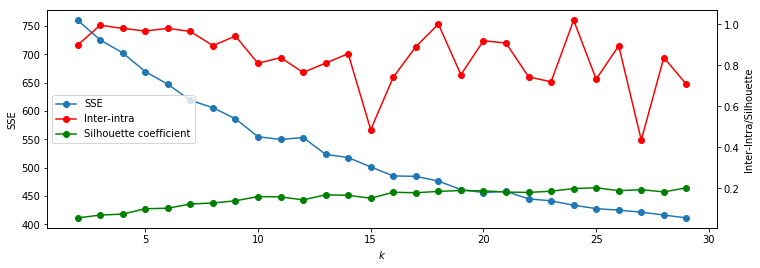

In [30]:
plt.figure(figsize=(12, 4))

inertias = []
iidrs = []
scs = []
range_ = range(2, 30, 1)
X = X_svd_2
for i in range_:
    kmeans = KMeans(n_clusters=i, random_state=42, max_iter=3000) # normal k means
#     kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1,
#                          init_size=1000, batch_size=1000)
    y = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    iidrs.append(intra_to_inter(X, y, euclidean, 50))
    scs.append(silhouette_score(X, y))
    
plt.plot(range_, inertias, '-o', label='SSE')
plt.xlabel('$k$')
plt.ylabel('SSE')
lines, labels = plt.gca().get_legend_handles_labels()
plt.twinx()
plt.plot(range_, iidrs, '-ro', label='Inter-intra')
plt.plot(range_, scs, '-go', label='Silhouette coefficient')
plt.ylabel('Inter-Intra/Silhouette')
lines2, labels2 = plt.gca().get_legend_handles_labels()
plt.legend(lines+lines2, labels+labels2)
plt.savefig('kmeans_clusters_pc_0.png');

From the plot above, the SSE (inertia) decreases smoothly, the silhouette coefficient, increases slowly, while the inter-intra ratio fluctuates erratically. Because the change in silhouette coefficient is slow and there doesn't seem to have a significant elbow for SSE, it was difficult to identify optimal clusters using these measures. Instead, the minimum inter-intra ratio was identified and its corresponding number of cluster. **For these reasons, the number of clusters selected was 15 clusters.**

In [31]:
clusters = 15
kmeans = KMeans(n_clusters=clusters, random_state=42, max_iter=3000)
# kmeans = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1,
#                          init_size=1000, batch_size=1000)
y = kmeans.fit_predict(X)

In [33]:
df_labeled = df_sample.copy()
df_labeled['Label'] = y

In [34]:
df_labeled.head()

,Tags,UserId,Label
0,css image css3 grayscale mysql backup m...,463065.0,12
1,php debugging stdin command-line-interface...,348221.0,12
2,python python,255247.0,9
3,ruby shoes delphi tcp performance client...,22722.0,4
4,ruby sinatra bundler,515275.0,11


**The charts below show the top words (count) for each cluster identified.**
The themes per each cluster can be based on the top three words in the cluster.

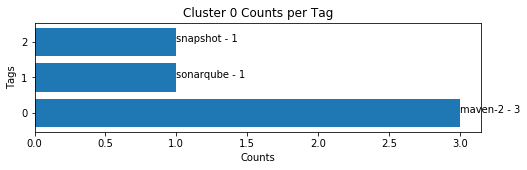

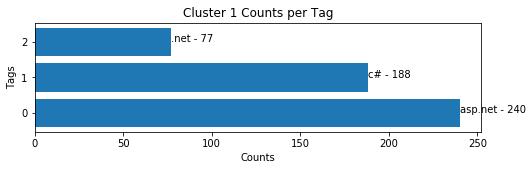

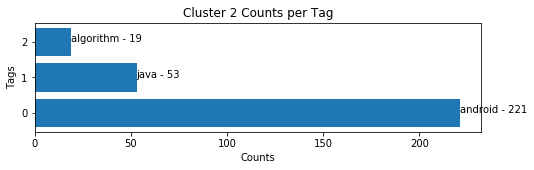

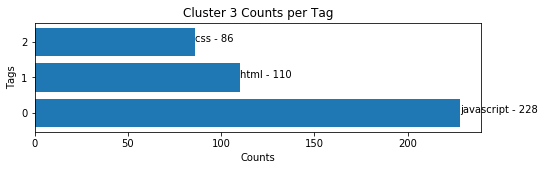

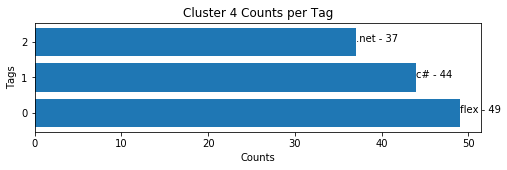

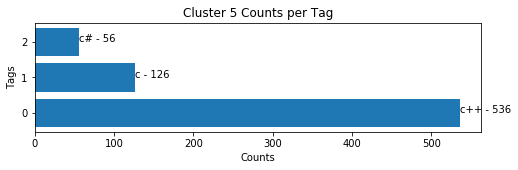

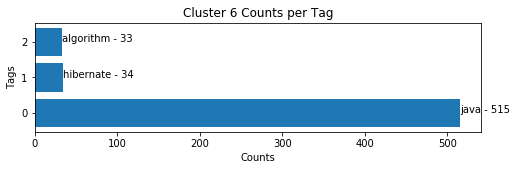

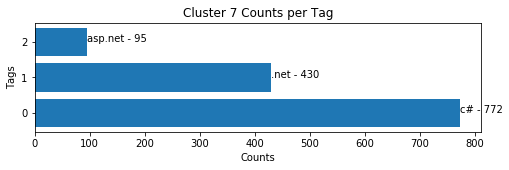

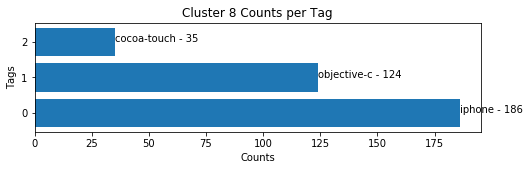

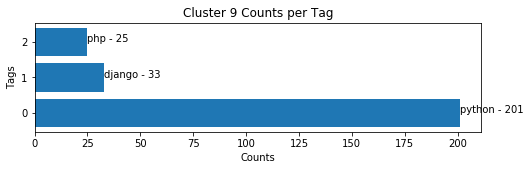

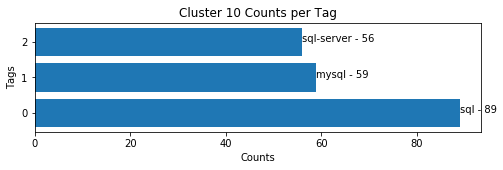

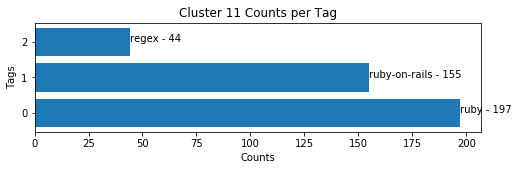

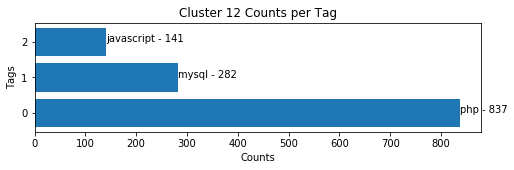

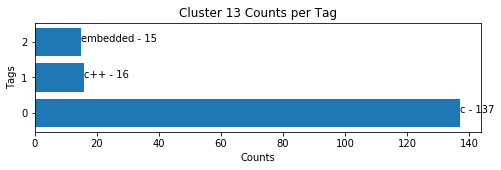

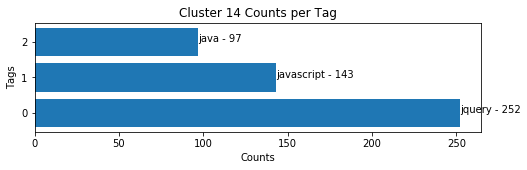

In [52]:
top_tags_ = []

i = 0

for i in range(clusters):
    plt.figure(figsize=(8, 2))
    labs = df_labeled[df_labeled["Label"] == i]
    d = dict(Counter(labs.Tags.sum().split()))
    _ = pd.DataFrame.from_dict(data=d, orient='index', columns=["Counts"])
    _ = _.sort_values(by="Counts", ascending=False).head(3)
    top_tags_.append(list(_.index))
    plt.barh(range(len(_)), _["Counts"])
#     plt.yticks(range(len(_)), _.index)
    plt.title("Cluster %s Counts per Tag"%i)
    plt.xlabel("Counts")
    plt.ylabel("Tags")

    plt.annotate(xy=(_["Counts"][0], 0), s=_.index[0]+" - "+str(_["Counts"][0]))
    plt.annotate(xy=(_["Counts"][1], 1), s=_.index[1]+" - "+str(_["Counts"][1]))
    plt.annotate(xy=(_["Counts"][2], 2), s=_.index[2]+" - "+str(_["Counts"][2]))

    plt.xlim(0, )
    plt.show()

**The chart below shows the number of users from the sampled dataset that belong to each cluster.**  The cluster defined by `flex`, `c#`, and `.net` was most dominant while the cluster defined by `maven`, `sonarqube`, and `snapshot` was least dominant.

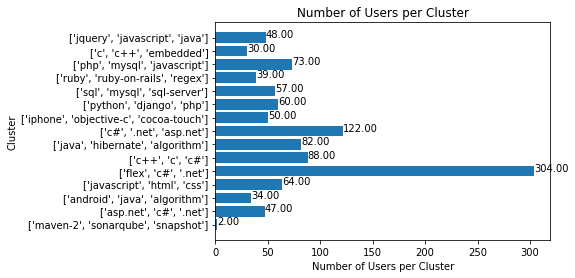

In [53]:
mem_counts=df_labeled.groupby(by="Label").count().values[:,0]

plt.barh(range(clusters), mem_counts)
plt.yticks(range(clusters), top_tags_)
plt.xlabel("Number of Users per Cluster")
plt.ylabel("Cluster")
plt.title("Number of Users per Cluster")
for i in range(clusters):
    plt.annotate(xy = list(zip(mem_counts, range(clusters)))[i], s="{:.2f}".format(mem_counts[i]));

**The chart below shows the percent of users that belong to each cluster.** 

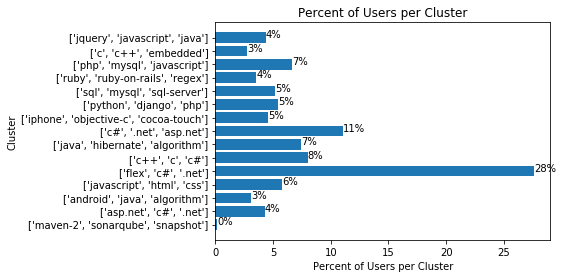

In [57]:
mem_percent = mem_counts/mem_counts.sum()*100

plt.barh(range(clusters), mem_percent)
plt.yticks(range(clusters), top_tags_)
plt.xlabel("Percent of Users per Cluster")
plt.ylabel("Cluster")
plt.title("Percent of Users per Cluster")
for i in range(clusters):
    plt.annotate(xy = list(zip(mem_percent, range(clusters)))[i], s="{:.0f}%".format(mem_percent[i]));

**The table below summarizes the clusters and proportion of users that belong in each cluster.**

In [95]:
df_clusters = pd.DataFrame([top_tags_, list(mem_percent)]).T
df_clusters.columns = ["Clusters", "Proportion of Total, %"]
df_clusters = df_clusters.sort_values(by="Proportion of Total, %", ascending=False).reset_index(drop=True)
df_clusters

,Clusters,"Proportion of Total, %"
0,"[flex, c#, .net]",27.6364
1,"[c#, .net, asp.net]",11.0909
2,"[c++, c, c#]",8
3,"[java, hibernate, algorithm]",7.45455
4,"[php, mysql, javascript]",6.63636
5,"[javascript, html, css]",5.81818
6,"[python, django, php]",5.45455
7,"[sql, mysql, sql-server]",5.18182
8,"[iphone, objective-c, cocoa-touch]",4.54545
9,"[jquery, javascript, java]",4.36364


**The keywords per cluster, proportion of users per cluster, and possible user types per cluster are summarized below.**

|Cluster|Most Common Words in Cluster|Proportion of Total, %|Possible User Cluster
|-|:-|-|:--|
|0|[flex, c#, .net]|27.6364|internet application developers, esp. using Adobe Flex|
|1|[c#, .net, asp.net]|11.0909|application developers, using C# on .net platforms
|2|[c++, c, c#]|8|developers using C++, C, and C#
|3|[java, hibernate, algorithm]|7.45455|data management professionals using using hibernate
|4|[php, mysql, javascript]|6.63636|website developers using php, javascript, and mysql
|5|[javascript, html, css]|5.81818|website developers using javascript, html, and css
|6|[python, django, php]|5.45455|web app developers using Django, powered by Python
|7|[sql, mysql, sql-server]|5.18182|database management professionals using sql, mysql, and sql-server
|8|[iphone, objective-c, cocoa-touch]|4.54545|iPhone developers using objective-c and cocoa-touch
|9|[jquery, javascript, java]|4.36364|HTML Javascript web developers using jquery
|10|[asp.net, c#, .net]|4.27273|web app developers
|11|[ruby, ruby-on-rails, regex]|3.54545|web app developers using Ruby and Ruby-on-Rails
|12|[android, java, algorithm]|3.09091|Android app developers
|13|[c, c++, embedded]|2.72727|C, C++ developers
|14|[maven-2, sonarqube, snapshot]|0.181818|application development project managers and quality checkers

## Summary

AIM ACCeSs Lab team collected posts and comments data from Stack Overflow. Among these data, `UserId` and post `Tags` from the year 2009 to 2010 were extracted. To reduce computational requirement, a sample with sample size of 1,100 for `UserId`s and corresponding `Tags` was randomly extracted from the dataset. A "profile" of each `UserId` was generated by concatenating all instances of tags per `UserId` in the dataset and then applying Tf-Idf vectorization on the corpus of tags. The resulting "Bag-of-Words" matrix was reduced to 96 components using SVD.

KMeans clustering was used on reduced BoW matrix with optimal number of clusters of 15 based on internal validation measures. Clusters for the tags were used as proxy for the cluster of `UserId`. Possible clusters of users were determined based on the prominent tags in each cluster.

## Limitations and Recommendations

A sample of 1,100 was extracted from a larger dataset of `UserId` and `Tags`. Further analysis by extracting different samples and of varying sample sizes may be conducted to validate the results of this analysis.

Other supervised clustering methods like k Medians, and k Medoids may also be explored in future studies.

## References

**Stack Overflow**
<br>https://stackoverflow.com/

**TfIdf Vectorization**
<br>http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
<br>http://www.tfidf.com/
<br>https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html.

**Dimensionality Reduction**
<br>http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm

**k Means Clustering**
<br>http://scikit-learn.org/stable/modules/clustering.html
<br>http://www.sthda.com/english/wiki/wiki.php?id_contents=7927

**Cluster Interpretation**
<br>https://www.adobe.com/products/flex.html
<br>https://docs.microsoft.com/en-us/dotnet/csharp/getting-started/introduction-to-the-csharp-language-and-the-net-framework
<br>https://en.wikipedia.org/wiki/Hibernate_(framework)
<br>https://www.siteground.com/tutorials/php-mysql/
<br>https://www.djangoproject.com/
<br>https://jquery.com/
<br>https://www.asp.net/
<br>https://www.ruby-lang.org/en/
<br>https://rubyonrails.org/
<br>https://maven.apache.org/
<br>https://www.sonarqube.org/

## Acknowledgements

I would like to acknowledge Prof. Alis and Prof. Monterola, whose codes were some of the basis of the codes used here. As well as Prof. Legara for facilitating our laboratory class at AIM. 

I would also like to thank John Titus Jungao, Jude Teves, Johniel Babiera, Allan Timonera, Jed Santo Domingo, Sashmir Yap, Jocaz Entico, Miggy Valdex, and Jayson Yodico whose insights and comments proved valuable to improve this notebook.